# Algoritmo de gradiente conjugado

In [4]:
import numpy as np
from numpy import linalg as la

def gradiente_conjugado(x0,grad,tolgrad=1e-3,tolf=1e-4,maxitr=1000): #definimos las tolerancias para este algoritmo como un parámetro por default
    g_tmp=grad(x0)
    x_k=x0
    d_k=-grad(x_k)
    iterations=0
    b=grad(np.zeros_like(x_k))
    #En este algoritmo se pide específicamente que la matriz Q sea positva definida y simétrica por lo que habrá que arreglar el Hessiano en caso de que eso no se cumpla 
    while la.norm(g_tmp)>tolgrad and iterations<maxitr:
        alpha=np.dot(g_tmp.T,g_tmp)/np.dot(d_k.T,(grad(d_k)-b)) #Esta es la aproximación de Q para que no se calcule de forma explícita
        tmp=x_k
        x_k=x_k+alpha*d_k
        g_k=grad(x_k)
        beta=np.dot(g_k.T,g_k)/np.dot(g_tmp.T,g_tmp)
        d_k=-g_k+beta*d_k
        g_tmp=g_k
        iterations+=1
        #print(la.norm(g_tmp))
    print(iterations)
    return np.array([iterations,x_k])

# Prueba del algoritmo

### Rosenbrock para n=2

In [5]:
def f(datos): #Función objetivo o target function
    x,y=datos
    return 100*(y-x**2)**2+(1-x)**2

def gradiente_f(datos): #gradiente de la función f
    g=np.zeros(len(datos))
    g[0]=2*(200*datos[0]**3-200*datos[0]*datos[1]+datos[0]-1)
    g[1]=200*(datos[1]-datos[0]**2)
    return g

def hessiano_f(datos):
    hes=np.zeros((len(datos),len(datos)))
    hes[0][0]=2*(600*datos[0]**2-200*datos[1]+1)
    hes[1][0]=-400*datos[0]
    hes[0][1]=-400*datos[0]
    hes[1][1]=200
    return hes

In [6]:
resultado=gradiente_conjugado([-1.2,1],gradiente_f)

1000


In [7]:
print(resultado)

[1000 array([-1.1999837 ,  1.00000665])]


# Parte 2, eliminación de ruido de la función g

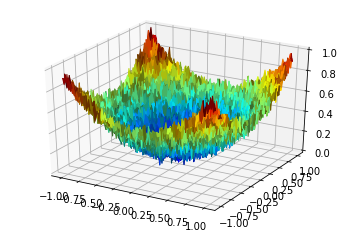

In [8]:
#parámetro global lambda


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt . figure ()
ax = fig.add_subplot(111 , projection ='3d' )
n = 128
x = y = np.linspace( -1,1 , n )
x , y = np.meshgrid ( x , y )
g = x**2 + y**2 + 0.1 * np.random.randn (*x.shape)
g = (g-g .min())/(g.max()-g.min())
my_col = cm.jet(g/np.amax(g))
ax . plot_surface(x,y,g,facecolors=my_col)
plt.savefig("grafica_original.png")


In [9]:
l=1 #cambiamos el parametro lambda

def funcion_suavizar(x,g=g): #en este caso x es una matriz de posiciones, g_i es parámetro por default que le vamos a pasar
    suma=0
    x=np.reshape(x,g.shape)
    for i in range(x.shape[0]):
        for j in range (x.shape[1]): #en el caso de esta funcion hay que checar que no nos salgamos de las fronteras
            suma_aux=0
            try:
                suma_aux+=(x[i,j]-x[i+1,j])**2
            except:
                pass
            try:
                suma_aux+=(x[i,j]-x[i-1,j])**2
            except:
                pass
            try:
                suma_aux+=(x[i,j]-x[i,j+1])**2
            except:
                pass
            try:
                suma_aux+=(x[i,j]-x[i,j-1])**2
            except:
                pass
            suma+=(x[i,j]-g[i,j])**2+l*suma_aux
    return suma


def grad_func_suavizado(x,g=g):
    x=np.reshape(x,g.shape)
    grad=np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            suma_aux=0
            try:
                suma_aux+=2*(x[i,j]-x[i+1,j])
            except:
                pass
            try:
                suma_aux+=2*(x[i,j]-x[i-1,j])
            except:
                pass
            try:
                suma_aux+=2*(x[i,j]-x[i,j+1])
            except:
                pass
            try:
                suma_aux+=2*(x[i,j]-x[i,j-1])
            except:
                pass
            grad[i,j]=2*(x[i,j]-g[i,j])+l*suma_aux
    return np.reshape(grad,(grad.shape[0]*grad.shape[1],1))

In [10]:
mat=np.zeros_like(g)
mat=np.reshape(mat,(mat.shape[0]*mat.shape[1],1))

res=gradiente_conjugado(mat,grad_func_suavizado)

print(res[1].shape)

15
(16384, 1)


In [11]:
grafic=np.reshape(res[1],g.shape)

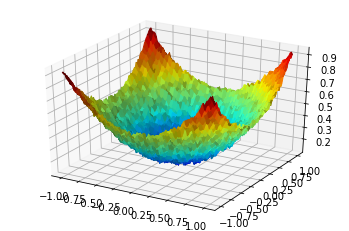

In [12]:
fig = plt . figure ()
ax = fig.add_subplot(111 , projection ='3d' )
n = 128
x = y = np.linspace( -1,1 , n )
x , y = np.meshgrid ( x , y )

my_col = cm.jet(grafic/np.amax(grafic))

ax . plot_surface(x,y,grafic,facecolors=my_col)

plt.savefig("elimina_ruido con lambda "+str(l)+".png")